TypeError: Invalid dimensions for image data

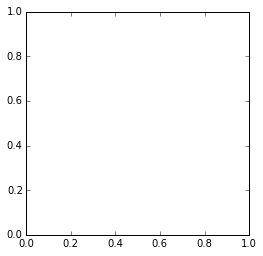

In [93]:
import socket
import struct
import math 
import sys, time
import pickle
import numpy as np
from IPython.display import Image as IPImage
import PIL
from PIL import Image
import matplotlib.pyplot as plt
from IPython import display
from IPython.display import clear_output
%matplotlib inline

# replace localhost with network name of game machine defined in game blend
HOST, PORT_SND, PORT_RCV = "localhost", 9999, 10000

# SOCK_DGRAM is the socket type to use for UDP sockets
sock = socket.socket(socket.AF_INET, socket.SOCK_DGRAM)
sock.bind((HOST, PORT_RCV))  
inputs = np.array([[0,0,0,0]])
ch = 1
nf = 0
X = Image.open('/Users/louis/Documents/Virtual_car/frame.jpg').convert("L")
basewidth = 75
wpercent = (basewidth / float(X.size[0]))
hsize = int((float(X.size[1]) * float(wpercent)))
X = X.resize((basewidth, hsize), PIL.Image.ANTIALIAS)
X = np.asarray(X.getdata())
X = X.reshape(-1,hsize,basewidth,ch)
KeyInput2 = [0,0,0,0]
while KeyInput2[1]==0:

    #data=struct.pack('<ff',theta,y)
    data = pickle.dumps((0.0,0.0))
    #data=struct.pack("f",theta)
    sock.sendto(data, (HOST, PORT_SND))
    
    KeyInput = sock.recvfrom(1024)
    KeyInput2 = pickle.loads(KeyInput[0])
    KeyInput2 = np.array(KeyInput2)
    
    if KeyInput2[0]==1:
        nf += 1
        Xim = Image.open('/Users/louis/Documents/Virtual_car/frame.jpg').convert("L")
        wpercent = (basewidth / float(Xim.size[0]))
        hsize = int((float(Xim.size[1]) * float(wpercent)))
        Xim = Xim.resize((basewidth, hsize), PIL.Image.ANTIALIAS)
        Xim = np.asarray(Xim.getdata())
        Xim = Xim.reshape(-1,hsize,basewidth,ch)
        
        X = np.concatenate((X, Xim), axis=0)
        inputs = np.append(inputs,[KeyInput2],axis=0)
        #plt.imshow(Xim[0])
        #plt.show()
        print X.shape
        if nf ==10:
            clear_output()
            nf = 0
        time.sleep(0.005)              # try for 30fps motion updates

fIm = open('/Users/louis/Documents/Virtual_car_data/images3.p', 'w')
pickle.dump(X,fIm)
fIm.close() 

fIn = open('/Users/louis/Documents/Virtual_car_data/inputs3.p', 'w')
pickle.dump(inputs,fIn)
fIn.close() 

data = pickle.dumps((0,0))

sock.sendto(data, (HOST, PORT_SND))

sock.close()

In [94]:
Xim.shape

(1575,)